# Suicide Rates
# generation is the feature to be predicted
# Classification task

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('suicide_rates.csv')

In [3]:
dataset.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
dataset.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
6103,Costa Rica,1992,female,75+ years,0,26500,0.00,Costa Rica1992,NaN,"8,528,593,084",3070,G.I. Generation
17752,New Zealand,2010,male,55-74 years,67,387900,17.27,New Zealand2010,0.905,"146,583,831,538",36145,Silent
27156,United States,2010,female,15-24 years,830,21395712,3.88,United States2010,0.909,"14,964,372,000,000",51989,Millenials
11266,Guyana,2005,male,5-14 years,1,96224,1.04,Guyana2005,0.618,"824,880,550",1235,Millenials
21286,Saint Kitts and Nevis,1992,female,35-54 years,0,2900,0.00,Saint Kitts and Nevis1992,NaN,"229,434,519",5868,Boomers


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
#print unique age values
dataset['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [7]:
#No need of country-year column- Drop it
dataset.drop('country-year',axis=1,inplace=True)

In [8]:
#Change column name HDI for year to hdi_year
dataset.rename(columns={'HDI for year':'hdi_year'},inplace=True)

In [9]:
dataset.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
hdi_year              19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [10]:
#Too many null values in column hdi_year , so better drop it than filling it.
dataset.drop('hdi_year',axis=1,inplace=True)

In [11]:
dataset.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X


In [12]:
agee = []

In [13]:
for i in dataset['age']:
    agee.append(i.replace(' years',''))

In [14]:
dataset['age'] = agee

In [15]:
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,"2,156,624,900",796,Boomers


# Exploratory Data Analysis

In [16]:
%matplotlib inline

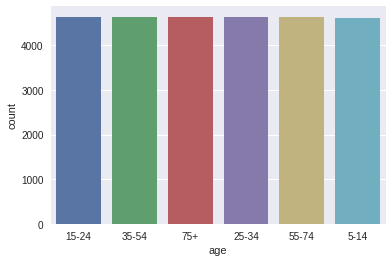

In [17]:
sns.countplot(dataset['age'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

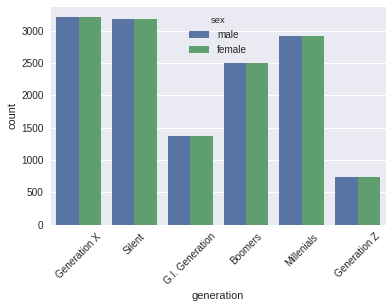

In [18]:
sns.countplot(x="generation", hue="sex",data=dataset)
plt.xticks(rotation=45)

/home/bhanuprakash/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


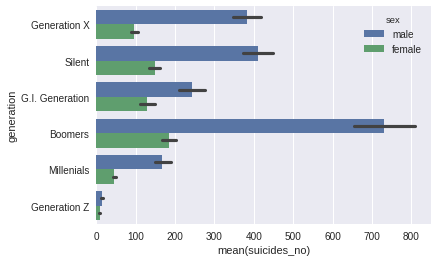

In [19]:
sns.barplot(x="suicides_no",y="generation",data=dataset,hue="sex")

In [20]:
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,"2,156,624,900",796,Boomers


In [21]:
#one hot encode 'sex' feature

In [22]:
gender = pd.get_dummies(dataset['sex'],drop_first=True)


In [23]:
dataset = pd.concat([dataset,gender],axis=1)

In [24]:
dataset.drop('sex',axis=1,inplace=True)

In [25]:
# age bins are converted into means
def means(arr):
    return str(np.array(arr).mean())
dataset.age.replace(['15-24', '25-34', '35-54', '5-14', '55-74', '75+'], 
                 [means([15, 24]), means([25, 34]), means([35, 54]), 
                  means([5, 14]), means([55, 74]), means([75])], inplace=True)

In [26]:
#dropping column country because it is not useful
dataset.drop('country',axis=1,inplace=True)

In [27]:
dataset

,year,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,male
0,1987,19.5,21,312900,6.71,"2,156,624,900",796,Generation X,1
1,1987,44.5,16,308000,5.19,"2,156,624,900",796,Silent,1
2,1987,19.5,14,289700,4.83,"2,156,624,900",796,Generation X,0
3,1987,75.0,1,21800,4.59,"2,156,624,900",796,G.I. Generation,1
4,1987,29.5,9,274300,3.28,"2,156,624,900",796,Boomers,1
5,1987,75.0,1,35600,2.81,"2,156,624,900",796,G.I. Generation,0
6,1987,44.5,6,278800,2.15,"2,156,624,900",796,Silent,0
7,1987,29.5,4,257200,1.56,"2,156,624,900",796,Boomers,0
8,1987,64.5,1,137500,0.73,"2,156,624,900",796,G.I. Generation,1
9,1987,9.5,0,311000,0.00,"2,156,624,900",796,Generation X,0


# Encoding categorical variables

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['generation'] = le.fit_transform(dataset['generation'])

In [29]:
#changing datatype to float
dataset['age']=dataset['age'].astype(float)

In [30]:
#gdp for year column 
dataset.iloc[:,5] = dataset.iloc[:,5].apply(lambda x: float(x.split()[0].replace(',', '')))

In [31]:
dataset.iloc[:,5] = dataset.iloc[:,5].astype(float)

In [32]:
dataset.iloc[:,5] = dataset.iloc[:,5].astype(int)


In [33]:
X = dataset.iloc[:,dataset.columns!='generation']

In [34]:
y = dataset['generation']

In [35]:
col = X.columns
col

Index(['year', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'male'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)

In [37]:
X.columns = col

In [38]:
X.head()

,year,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),male
0,-1.683615,-0.893081,-0.245639,-0.391617,-0.322032,-0.305056,-0.850864,1.0
1,-1.683615,0.172535,-0.251182,-0.392870,-0.402196,-0.305056,-0.850864,1.0
2,-1.683615,-0.893081,-0.253400,-0.397548,-0.421182,-0.305056,-0.850864,-1.0
3,-1.683615,1.472585,-0.267811,-0.466035,-0.433839,-0.305056,-0.850864,1.0
4,-1.683615,-0.466834,-0.258943,-0.401485,-0.502928,-0.305056,-0.850864,1.0


In [39]:
y.head()

0    2
1    5
2    2
3    1
4    0
Name: generation, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [41]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((20865, 8), (6955, 8), (20865,), (6955,))

# Fitting SVC 

In [42]:
from sklearn.svm import SVC 
classifier = SVC(kernel = 'linear', C = 1)
classifier.fit(X_train, y_train) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.995255212077642

# We got a very good accuracy and lets try with another model(DecisionTreeClassifier)

In [45]:
from sklearn.tree import DecisionTreeClassifier
classi = DecisionTreeClassifier()
classi.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [46]:
dec_pred = classi.predict(X_test)

In [47]:
accuracy_score(y_test,dec_pred)

1.0

# Decision tree works very well , we got an accuracy of 1.0